In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-08 19:36:58--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  3.49MB/s    in 0.2s    

2025-10-08 19:36:59 (3.49 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv('car_fuel_efficiency.csv')

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


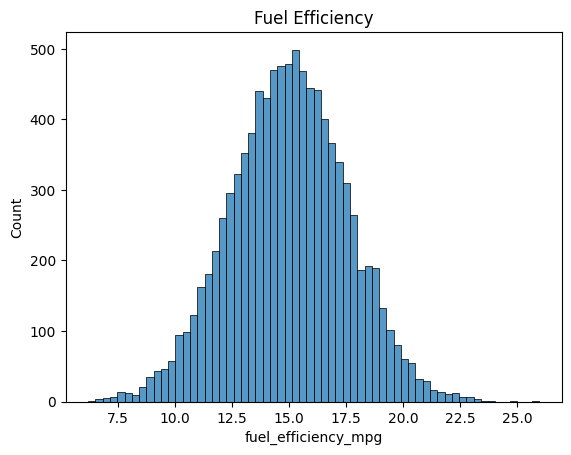

In [5]:
plt.figure()
sns.histplot(df.fuel_efficiency_mpg)
plt.title('Fuel Efficiency')
plt.show()

In [6]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [7]:
df['horsepower'].median()

np.float64(149.0)

In [8]:
np.random.seed(42)

n=len(df)
n

9704

In [9]:
n_val=int(0.2*n)
n_test=int(0.2*n)
n_train=n-n_val-n_test
n_train,n_val,n_test

(5824, 1940, 1940)

In [10]:
idx=np.arange(n)
np.random.shuffle(idx)
df_shuffled=df.iloc[idx]
df_train=df_shuffled.iloc[:n_train].copy()
df_val=df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test=df_shuffled.iloc[n_train+n_val:].copy()

In [11]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [12]:
df_val.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
6163,180,0.0,112.0,2772.134410,15.9,2020,Europe,Gasoline,Front-wheel drive,3.0,15.366341
3313,260,5.0,138.0,3014.061530,NaN,2022,Europe,Gasoline,Front-wheel drive,-2.0,14.601182
4781,140,7.0,181.0,3652.186151,NaN,2016,USA,Diesel,All-wheel drive,1.0,12.247032
8210,270,4.0,105.0,2753.040847,16.3,2023,Asia,Gasoline,Front-wheel drive,0.0,15.136400
6713,170,4.0,224.0,4163.375137,11.9,2003,USA,Gasoline,Front-wheel drive,0.0,10.340419


In [13]:
df_test.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
3729,140,11.0,148.0,2704.826005,18.9,2017,USA,Diesel,All-wheel drive,0.0,15.804354
7764,210,4.0,136.0,3001.227490,14.9,2004,Europe,Diesel,Front-wheel drive,NaN,14.272374
4358,210,NaN,152.0,3747.467392,13.7,2021,USA,Gasoline,Front-wheel drive,1.0,11.748441
5922,190,2.0,128.0,2705.833636,16.7,2014,Asia,Diesel,Front-wheel drive,0.0,16.485991
1343,230,1.0,156.0,2505.939657,17.5,2005,Asia,Diesel,All-wheel drive,1.0,17.779704


In [14]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [15]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [16]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
base

['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [17]:
def prepare_X_mean(df):
  df_num=df[base]
  df_num=df_num.fillna(df_train['horsepower'].mean())
  X=df_num.values
  return X

In [18]:
def prepare_X(df):
  df_num=df[base]
  df_num=df_num.fillna(0)
  X=df_num.values
  return X

In [19]:
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']

In [20]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
X_test = prepare_X(df_test)

In [21]:
w_0, w = train_linear_regression(X_train, y_train)
y_pred=w_0+X_train.dot(w)

In [22]:
#fillna(0)
rmse(y_train, y_pred)

np.float64(0.5202614265099076)

In [28]:
#null replaced with mean
X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred=w_0+X_train.dot(w)
rmse(y_train, y_pred)

np.float64(0.4667165231665452)

In [24]:
#Regularized
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

for r in r_values:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train.dot(w)
    
    score = rmse(y_train, y_pred)
    print(f"r={r:>6}: RMSE={score:.3f}")


r=     0: RMSE=0.520
r=  0.01: RMSE=0.520
r=   0.1: RMSE=0.524
r=     1: RMSE=0.528
r=     5: RMSE=0.529
r=    10: RMSE=0.529
r=   100: RMSE=0.529


In [25]:
import numpy as np

seeds = range(10)
rmse_scores = []

for seed in seeds:
    np.random.seed(seed)
    idx = np.arange(len(df))
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]
    
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values
    
    X_train_df = df_train.drop(columns=['fuel_efficiency_mpg'])
    X_val_df = df_val.drop(columns=['fuel_efficiency_mpg'])
    
    X_train = X_train_df[base].fillna(0).values
    X_val = X_val_df[base].fillna(0).values
    
    w_0, w = train_linear_regression(X_train, y_train)
    
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    
    rmse_scores.append(rmse_val)


std_rmse = round(np.std(rmse_scores), 3)
print("RMSE scores for each seed:", rmse_scores)
print("Standard deviation:", std_rmse)


RMSE scores for each seed: [np.float64(0.5206531296294218), np.float64(0.521338891285577), np.float64(0.5228069974803171), np.float64(0.515951674119676), np.float64(0.5109129460053851), np.float64(0.52834064601107), np.float64(0.5313910658146311), np.float64(0.5090670387381733), np.float64(0.5147399129511132), np.float64(0.5131865908224594)]
Standard deviation: 0.007


In [26]:
import numpy as np

# Features to use
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

np.random.seed(9)
idx = np.arange(len(df))
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]


n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


df_train_val = pd.concat([df_train, df_val], axis=0)

y_train_val = df_train_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

X_train_val = df_train_val[base].fillna(0).values
X_test = df_test[base].fillna(0).values

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X) + r * np.eye(X.shape[1])
    w = np.linalg.inv(XTX).dot(X.T).dot(y)
    return w[0], w[1:]

w_0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

y_pred_test = w_0 + X_test.dot(w)
rmse_test = np.sqrt(((y_pred_test - y_test) ** 2).mean())

print("Test RMSE:", rmse_test)


Test RMSE: 0.5156261299169602
